In [6]:
import torch
import torch.nn as nn
import cv2
import numpy as np
from torch.utils.data import DataLoader
from datasets.fdst import FDST
import matplotlib.pyplot as plt
from testing.utils import show_image
from torchvision import transforms
from models.model import MyModel


dataset_path = '../datasets/our_dataset'
model_path = './save_dir/40_ckpt.tar'


In [2]:
dataset = FDST(dataset_path, training=False, sequence_len=5)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


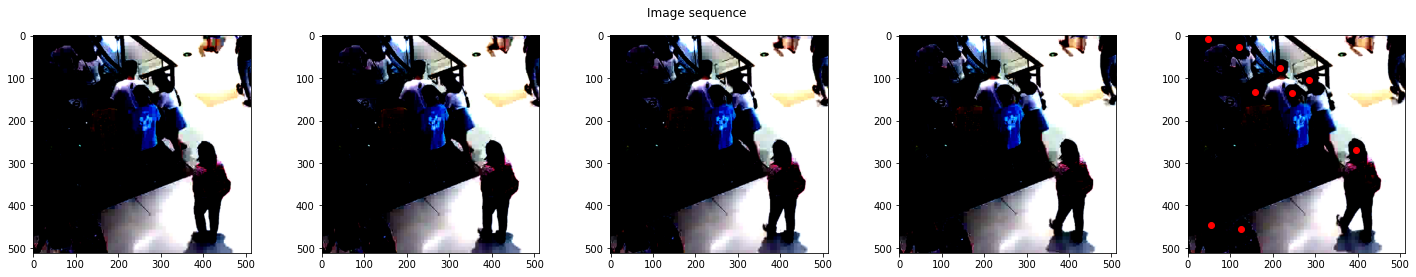

In [3]:
a, b, c = next(iter(dataloader))
show_image(a, b)


In [4]:
model = MyModel()
model.eval().to(device)
save = torch.load(model_path)
model.load_state_dict(save['model_state_dict'], device)
image = a.to(device)
#net = torch.load(model_path)

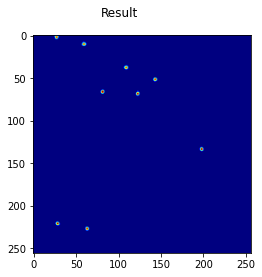

In [7]:
with torch.set_grad_enabled(False):
    outputs, _ = model(image)
count = torch.sum(outputs).item()
vis_img = outputs[0, 0].cpu().numpy()

vis_img = (vis_img - vis_img.min()) / (vis_img.max() - vis_img.min() + 1e-5)
vis_img = (vis_img * 255).astype(np.uint8)
vis_img = cv2.applyColorMap(vis_img, cv2.COLORMAP_JET)
vis_img = cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 1)
fig.suptitle('Result')
fig.set_figwidth(25)
axs.imshow(vis_img)

In [8]:
count

8.859745025634766

In [ ]:
show_image_1(output, b)